# CSCI 381/780 (Fall 2022) - Project 1

**Due Date: Friday, October 7 by 4 PM**

## Description
In this project you will construct machine learning models on a dataset comprised of sociodemographic data of U.S. citizens collected from the 1994 U.S. Census. The machine learning task will be binary classification of people based on their income level being either <= 50,000 USD or > 50,000 USD.

## Instructions
1. In this project you will write code to construct machine learning models using various partitions (see the figure below) of the census dataset and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be intialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `StratifiedShuffleSplit`
- `RandomForestClassifier`
- `RandomizedSearchCV`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or come to office hours should you need further assistance.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above. 

<img src="project-1-data-folds.png" width="600" height="300">

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.

### Holdout Set Evaluation
Your final models will be evaluated against a holdout set. You model performances with respect to AUC on this set must be *comparable* (e.g., within 5%) of those reported in Part 6.

### Rubric

|**Part**|0|1|2|3|4|5|6|7|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|15|5|10|20|10|10|20|10|100|


## Part 0: Load Data

Set the variable `CENSUS_FILE` to the **full path** to the census dataset (**census_dataset.csv**) on your system. Load the file into a dataframe (you may intialize the column names using the header list `census_column_names`), then:
1. Determine the number and types of features.
2. Determine the number of classes and their prevalence in the dataset. Are the classes balanced?
3. Perform any necessary preprocessing on dataset.
4. Perform a **stratified split** of the data into training/validation/test sets, 60%/20%/20%. 
5. Verify that the training/validation/test splits have the same prevalence as the original dataset.
6. Standardize the training/validation/test splits (fit on the training, then transform the validation/test sets). Use the standardized splits for the SVM models *only*.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from collections import Counter
sc = StandardScaler()
sns.set()
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
census_column_names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','sex',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'annual-income']
CENSUS_FILE = pd.read_csv('census_dataset.csv', header=None)
row =len(CENSUS_FILE.axes[0])
column =len(CENSUS_FILE.axes[1])
CENSUS_FILE.columns=census_column_names
print("Row: "+str(row))
print("Features: "+ str(column))
CENSUS_FILE.isna().sum()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
#CENSUS_FILE = np.array(ct.fit_transform(CENSUS_FILE))

Row: 27482
Features: 15


In [2]:
shuffle = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=23784559)
shuffle2 = StratifiedShuffleSplit(n_splits=1,test_size=0.25, random_state=23784559)
shuffle3 = StratifiedShuffleSplit(n_splits=1,test_size=0.16666, random_state=23784559)
CENSUS_FILE.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,73,Unknown,378922,HS-grad,9,Married-spouse-absent,Unknown,Not-in-family,White,Female,0,0,20,Canada,<=50K
1,46,Private,207807,10th,6,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,30,United-States,<=50K
2,55,Self-emp-not-inc,319733,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,38,Unknown,365465,Assoc-voc,11,Never-married,Unknown,Own-child,White,Male,0,0,15,United-States,<=50K
4,26,Self-emp-not-inc,33016,Assoc-voc,11,Divorced,Other-service,Unmarried,White,Female,0,0,55,United-States,<=50K


<AxesSubplot:>

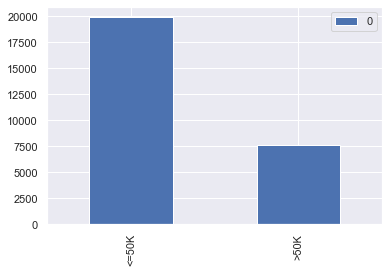

In [3]:
counts1 = Counter(CENSUS_FILE['annual-income'])
plottedcolumn1 = pd.DataFrame.from_dict(counts1, orient='index')
plottedcolumn1.plot(kind="bar")

In [4]:
print("This graph indicates a poorly balanced dataset")
print(counts1)
Lessthanequalto50k=counts1['<=50K']
morethan50k=counts1['>50K']
print("Number less than or equal to 50K",Lessthanequalto50k)
print("More than 50K",morethan50k)
prevalenceofmore=morethan50k/row
prevalenceoflessthanorequal=Lessthanequalto50k/row
print("Prevalence of more than 50k ",prevalenceofmore)
print("Prevalence of less than or equal to 50k ",prevalenceoflessthanorequal)

This graph indicates a poorly balanced dataset
Counter({'<=50K': 19915, '>50K': 7567})
Number less than or equal to 50K 19915
More than 50K 7567
Prevalence of more than 50k  0.2753438614365767
Prevalence of less than or equal to 50k  0.7246561385634234


In [5]:
oldCENSUS_FILE=CENSUS_FILE
CENSUS_FILE['pricerange']= 0
c1 = CENSUS_FILE['annual-income'] == '<=50K'
CENSUS_FILE['pricerange'] = np.where( c1, 1, 0)
census_column_names.append('pricerange')
calledcol=['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country','annual-income']
CENSUS_FILE = pd.get_dummies(CENSUS_FILE, columns=calledcol, drop_first=False)
calledcol2=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_Female', 'sex_Male', 'native-country_Cambodia', 'native-country_Canada', 'native-country_China', 'native-country_Columbia', 'native-country_Cuba', 'native-country_Dominican-Republic', 'native-country_Ecuador', 'native-country_El-Salvador', 'native-country_England', 'native-country_France', 'native-country_Germany', 'native-country_Greece', 'native-country_Guatemala', 'native-country_Haiti', 'native-country_Honduras', 'native-country_Hong', 'native-country_Hungary', 'native-country_India', 'native-country_Iran', 'native-country_Ireland', 'native-country_Italy', 'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos', 'native-country_Mexico', 'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru', 'native-country_Philippines', 'native-country_Poland', 'native-country_Portugal', 'native-country_Puerto-Rico', 'native-country_Scotland', 'native-country_South', 'native-country_Taiwan', 'native-country_Thailand', 'native-country_Trinadad&Tobago', 'native-country_United-States', 'native-country_Unknown', 'native-country_Vietnam', 'native-country_Yugoslavia']
X = CENSUS_FILE[calledcol2]
y = CENSUS_FILE['pricerange']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23784559,stratify=y)
#X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=23784559,stratify=y_train)
train, test = next(shuffle.split(X=X, y=y))
X_test = X.loc[test]
y_test = y.loc[test]
X_train = X.loc[train]
y_train = y.loc[train]
X_train0=X_train
y_train0=y_train
train, val = next(shuffle2.split(X=X_train, y=y_train))
X_train = X.loc[train]
y_train = y.loc[train]
X_val = X.loc[val]
y_val = y.loc[val]
counts2 = Counter(y_train)
counts3 = Counter(y_test)
counts4 = Counter(y_val)
print('Training prevalence of more than 50k',counts2[0]/(counts2[1]+counts2[0]))
print('Training prevalence of less than or equal to 50k',counts2[1]/(counts2[1]+counts2[0]))
print('Testing prevalence of more than 50k',counts3[0]/(counts3[1]+counts3[0]))
print('Testing prevalence of less than or equal to 50k',counts3[1]/(counts3[1]+counts3[0]))
print('Validation prevalence of more than 50k',counts4[0]/(counts4[1]+counts4[0]))
print('Validation prevalence of less than or equal to 50k',counts4[1]/(counts4[1]+counts4[0]))
print("Roughly same prevalence for all")
#model = DecisionTreeClassifier(max_depth=100)
#model.fit(X_train,y_train)
from sklearn import preprocessing
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)
X_val1 = preprocessing.scale(X_val)
sc.fit(X_train1)
#sc.fit(y_train)
sc.transform(X_test1)
#sc.transform(y_test)
sc.transform(X_val1)
#sc.tranform(y_val)

Training prevalence of more than 50k 0.2763828238719068
Training prevalence of less than or equal to 50k 0.7236171761280932
Testing prevalence of more than 50k 0.2754229579770784
Testing prevalence of less than or equal to 50k 0.7245770420229216
Validation prevalence of more than 50k 0.27815171911951975
Validation prevalence of less than or equal to 50k 0.7218482808804803
Roughly same prevalence for all


array([[ 2.98213894e-01,  2.15721708e-01,  1.12498430e+00, ...,
        -1.29015851e-01, -4.26906257e-02, -2.33677178e-02],
       [-1.54086546e+00, -3.99925921e-01, -4.19577346e-01, ...,
        -1.29015851e-01, -4.26906257e-02, -2.33677178e-02],
       [-1.09948642e+00, -3.51716756e-01, -4.19577346e-01, ...,
        -1.29015851e-01, -4.26906257e-02, -2.33677178e-02],
       ...,
       [ 3.96119694e-03, -1.50653938e+00,  1.12498430e+00, ...,
        -1.29015851e-01, -4.26906257e-02, -2.33677178e-02],
       [ 1.47522468e+00, -1.32147352e+00, -4.19577346e-01, ...,
        -1.29015851e-01, -4.26906257e-02, -2.33677178e-02],
       [ 7.75243713e-02, -1.04145108e+00,  1.89726512e+00, ...,
         7.75098560e+00, -4.26906257e-02, -2.33677178e-02]])

In [6]:
print("Classes minus pricerange: ",len(CENSUS_FILE.columns.tolist())-1)

Classes minus pricerange:  109


## Part 1: Train Initial Models

In [7]:
print(CENSUS_FILE.columns.tolist())

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'pricerange', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', '

Using default hyperparameters:
1. Construct **Naive Bayes (NB)**, **Support Vector Machine (SVM)** , and **Random Forest (RF)** models on the training set.
2. Calculate the confusion matrix and report the following performance metrics on the **training set**:
    *Accuracy*, *F1 Score*, *AUC*, *Sensitivity*, *Specificity*, and *Precision*. You can use the function `p1_metrics` for this purpose. Are any of the models underfitting the data? Is so, why?

3. Calculate the same metrics by applying the trained model to the **validation set**. Compare and contrast the errors each model makes in terms of each class. 

In [8]:
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [10]:
gnbmodel = GaussianNB()
y_pred1 = gnbmodel.fit(X_train, y_train).predict(X_test)
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
svmmodel = svm.SVC(kernel='linear',random_state=23784559) 
svmmodel.fit(X_train1, y_train)
y_pred2 = svmmodel.predict(X_test1)
y_pred2

array([0, 1, 1, ..., 0, 1, 1])

In [12]:
rfcmodel = RandomForestClassifier(random_state=23784559)
rfcmodel.fit(X_train, y_train)
y_pred3 = rfcmodel.predict(X_test)
y_pred3

array([0, 1, 1, ..., 0, 1, 1])

In [13]:
print(p1_metrics(y_test,y_pred1,include_cm=True))
print("This GNB model is poor in regards to specificity and thus underfits but is still mostly accurate.")

{'auc': 0.6216831043161972, 'f1': 0.8559456398640997, 'accuracy': 0.7686010551209751, 'sensitivity': 0.9487823248807432, 'specificity': 0.29458388375165123, 'precision': 0.7796575201155354, 'confusion_matrix': array([[ 446, 1068],
       [ 204, 3779]], dtype=int64)}
This GNB model is poor in regards to specificity and thus underfits but is still mostly accurate.


In [14]:
print(p1_metrics(y_test,y_pred2,include_cm=True))
print("This SVM Model has stronger metrics than the previous but not as strong as the one after")

{'auc': 0.7873127237257685, 'f1': 0.896779723276601, 'accuracy': 0.8466436237947972, 'sensitivity': 0.91940748179764, 'specificity': 0.655217965653897, 'precision': 0.8752390057361377, 'confusion_matrix': array([[ 992,  522],
       [ 321, 3662]], dtype=int64)}
This SVM Model has stronger metrics than the previous but not as strong as the one after


In [15]:
print(p1_metrics(y_test,y_pred3,include_cm=True))
print("RFC is the most successful and accurate though it may be overfitting")

{'auc': 0.9182310818335919, 'f1': 0.9582242174834766, 'accuracy': 0.9390576678188103, 'sensitivity': 0.9645995480793372, 'specificity': 0.8718626155878467, 'precision': 0.9519326065411299, 'confusion_matrix': array([[1320,  194],
       [ 141, 3842]], dtype=int64)}
RFC is the most successful and accurate though it may be overfitting


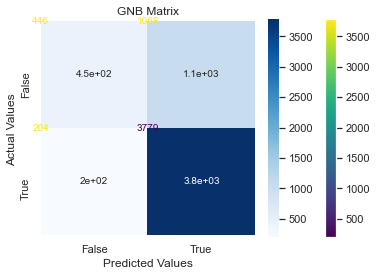

In [16]:
from sklearn.metrics import plot_confusion_matrix
cf1=confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(gnbmodel, X_test, y_test)  
ax1 = sns.heatmap(cf1, annot=True, cmap='Blues')
ax1.set_title('GNB Matrix');
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

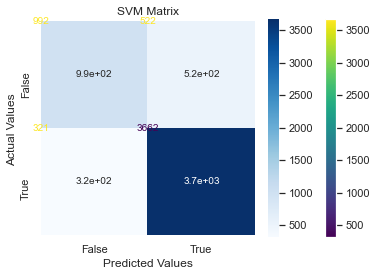

In [17]:
cf2=confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(svmmodel, X_test1, y_test)  
ax2 = sns.heatmap(cf2, annot=True, cmap='Blues')
ax2.set_title('SVM Matrix');
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values ');
ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])
plt.show()

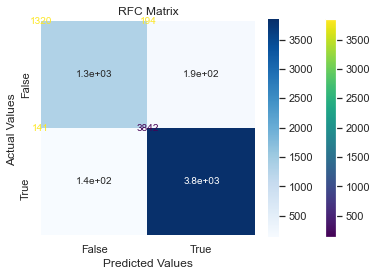

In [18]:
cf3=confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(rfcmodel, X_test, y_test)  
ax3 = sns.heatmap(cf3, annot=True, cmap='Blues')
ax3.set_title('RFC Matrix');
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Actual Values ');
ax3.xaxis.set_ticklabels(['False','True'])
ax3.yaxis.set_ticklabels(['False','True'])
plt.show()

In [19]:
y_pred4 = gnbmodel.fit(X_train, y_train).predict(X_val)
y_pred4

array([0, 1, 1, ..., 1, 1, 0])

In [20]:
print(p1_metrics(y_val,y_pred4,include_cm=True))
print("Even with validation, the GNB metrics are largely the same")

{'auc': 0.6204412935926917, 'f1': 0.8533454504146313, 'accuracy': 0.7651446243405494, 'sensitivity': 0.9465725806451613, 'specificity': 0.2943100065402224, 'precision': 0.7768355739400207, 'confusion_matrix': array([[ 450, 1079],
       [ 212, 3756]], dtype=int64)}
Even with validation, the GNB metrics are largely the same


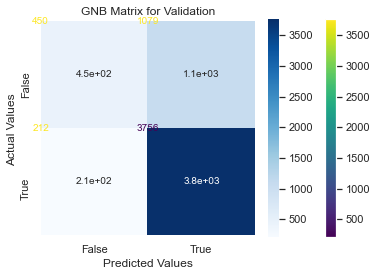

In [21]:
cf4=confusion_matrix(y_val, y_pred4)
plot_confusion_matrix(gnbmodel, X_val, y_val)  
ax4 = sns.heatmap(cf4, annot=True, cmap='Blues')
ax4.set_title('GNB Matrix for Validation');
ax4.set_xlabel('Predicted Values')
ax4.set_ylabel('Actual Values ');
ax4.xaxis.set_ticklabels(['False','True'])
ax4.yaxis.set_ticklabels(['False','True'])
plt.show()

In [22]:
y_pred5 = svmmodel.predict(X_val1)
y_pred5

array([0, 1, 1, ..., 1, 1, 0])

In [23]:
print(p1_metrics(y_val,y_pred5,include_cm=True))
print("Validation improves SVM metrics but by little")

{'auc': 0.7923467036488112, 'f1': 0.8970189701897018, 'accuracy': 0.8479170456612698, 'sensitivity': 0.9175907258064516, 'specificity': 0.6671026814911707, 'precision': 0.8773493975903615, 'confusion_matrix': array([[1020,  509],
       [ 327, 3641]], dtype=int64)}
Validation improves SVM metrics but by little


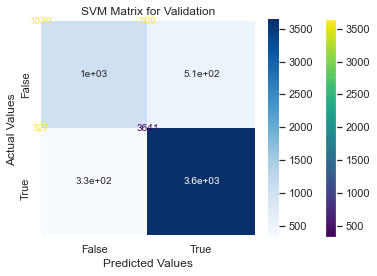

In [24]:
cf5=confusion_matrix(y_val, y_pred5)
plot_confusion_matrix(svmmodel, X_val1, y_val)  
ax5 = sns.heatmap(cf5, annot=True, cmap='Blues')
ax5.set_title('SVM Matrix for Validation');
ax5.set_xlabel('Predicted Values')
ax5.set_ylabel('Actual Values ');
ax5.xaxis.set_ticklabels(['False','True'])
ax5.yaxis.set_ticklabels(['False','True'])
plt.show()

In [25]:
y_pred6 = rfcmodel.predict(X_val)
y_pred6

array([0, 1, 1, ..., 1, 1, 0])

In [26]:
print(p1_metrics(y_val,y_pred6,include_cm=True))
print("Validation degrades all RFC metrics, indicating that the rfc overfits too much")

{'auc': 0.8034079701048545, 'f1': 0.8980606663351566, 'accuracy': 0.8508277242132072, 'sensitivity': 0.9102822580645161, 'specificity': 0.696533682145193, 'precision': 0.8861629048086359, 'confusion_matrix': array([[1065,  464],
       [ 356, 3612]], dtype=int64)}
Validation degrades all RFC metrics, indicating that the rfc overfits too much


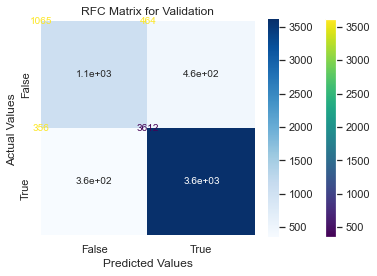

In [27]:
cf6=confusion_matrix(y_val, y_pred6)
plot_confusion_matrix(rfcmodel, X_val, y_val)  
ax6 = sns.heatmap(cf6, annot=True, cmap='Blues')
ax6.set_title('RFC Matrix for Validation');
ax6.set_xlabel('Predicted Values')
ax6.set_ylabel('Actual Values ');
ax6.xaxis.set_ticklabels(['False','True'])
ax6.yaxis.set_ticklabels(['False','True'])
plt.show()

In [28]:
print("GNB is the best in regards to predicting for true-true, with SVM and RFC being equally good. RFC is best at finding false-false, with SVM after, with GNB coming last. But SVM lags due to poor runtime")

GNB is the best in regards to predicting for true-true, with SVM and RFC being equally good. RFC is best at finding false-false, with SVM after, with GNB coming last. But SVM lags due to poor runtime


## Part 2: Cross-Validation Models

Split the **non-test data** (*training* + *validation* data) into **stratified 5-folds** for cross-validation purposes, then:
1. Train NB, SVM, and RF models using 5-fold cross-validation.
2. Report the mean and standard deviation of the performance metrics listed in Part 1.2 for each model. You may use the function `collate_cv_results` for this purpose.
3. How does the performance of these models compare with those created in Part 1? Which models' performances are more consistent, and why?

In [29]:
#Summarizes model performance results produced during cross-validation
def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

In [30]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [31]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=23784559)
gnbmodel2 = GaussianNB()
svmmodel2 = svm.SVC(kernel='linear') 
rfcmodel2 = RandomForestClassifier(random_state=23784559)
sc7 = StandardScaler()
X_train00 = preprocessing.scale(X_train0)
sc7.fit(X_train00)
models=[gnbmodel2,svmmodel2,rfcmodel2]
modelnames=['GaussianNB','SVMModel','RandomForestClassifier']
modelindex=0
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
gnbarray=[]
svmarray=[]
rfcarray=[]
crossvalidresults=[]
crossvalidresults2=[]
metric_keys2 = ['roc_auc','f1','accuracy','precision']
for model in models:  
  a=X_train0
  b=X_test
  if model==svmmodel2:
   a=X_train00
   b=X_test1
  cv_results = model_selection.cross_validate(model, a, y_train0, cv=skf, scoring=metric_keys2)
  cvf = model.fit(a, y_train0)
  y_pred00= cvf.predict(b)
  print(modelnames[modelindex])
  modelindex=modelindex+1
  stored=collate_cv_results(cv_results,display=True)
  crossvalidresults.append(stored)
  print('')

GaussianNB
fit_time 0.048000335693359375 (0.0006327113962082757)
score_time 0.02839961051940918 (0.0004902522485502363)
test_roc_auc 0.8370417647650263 (0.009095332792019177)
test_f1 0.8562265911666301 (0.0016003060550402127)
test_accuracy 0.7698885603820788 (0.0027943093115137883)
test_precision 0.7823513404526622 (0.0025127580615852806)

SVMModel
fit_time 25.500922441482544 (0.6952901169904244)
score_time 2.4009073257446287 (0.052191323768469626)
test_roc_auc 0.9109537694506749 (0.0030636731284032766)
test_f1 0.8976475453401823 (0.0030352000941717984)
test_accuracy 0.8483966340686833 (0.004659994896471468)
test_precision 0.8788069082559373 (0.004804319225638899)

RandomForestClassifier
fit_time 2.411224603652954 (0.17435365341652276)
score_time 0.201386022567749 (0.009899951700048659)
test_roc_auc 0.9144570035961781 (0.0034973210418408622)
test_f1 0.9019583562016052 (0.00193824076434171)
test_accuracy 0.8555378667273141 (0.002963201723884896)
test_precision 0.8874503178921896 (0.0032

In [32]:
print("RFC has the best metrics but performs similarily to part 1 validation. GNB and SVM perform near identically compared to their forbears in part 1 because they likely do not utilize random feature selection. SVM has worst run time.")

RFC has the best metrics but performs similarily to part 1 validation. GNB and SVM perform near identically compared to their forbears in part 1 because they likely do not utilize random feature selection. SVM has worst run time.


## Part 3: SVM Hyperparameter Tuning

Utilizing the cross-validation dataset from Part 2, you will construct SVM models using the below strategies:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Kernel type*: Linear, radial basis function
- *Box constraint (C)*: [1, 5, 10, 20]
- *Kernel width (gamma)*: 'auto','scale'
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameters. You may use the function `collate_ht_results` for this purpose.
3. Using `RandomizedSearchCV`, determine the best choice of hyperparameters after **16 trials** using the same possible values for *kernel type* and *kernel width* but with possible **box constraint** values of [1,5,10,15,....,100]. 
4. Report the time required to perform cross-validation via `RandomizedSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameters.
5. Compare the performance of the two models (using the metrics in 1.2) as well as the time required to compute the models. Which hyperparameter method do you think is better in this case, and why?

### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p1_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"auc"`
- `cv` - This will enable you to reuse your CV splits from Part 2.
    `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [33]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [33]:
parameters = {'C': [1, 5, 10, 20], 'gamma': ['auto','scale'],'kernel': ['rbf','linear'],'random_state':[23784559]} 
svmmodel3 = svm.SVC()
start1 = timeit.default_timer()
svmgrid = GridSearchCV(svmmodel3, parameters, scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop1 = timeit.default_timer()
start11 = timeit.default_timer()
svmgrid.fit(X_train00, y_train0)
stop11 = timeit.default_timer()
print('Best parameters: ',svmgrid.best_params_)
print('Best score: ',svmgrid.best_score_)
start12 = timeit.default_timer()
svmgridpred = svmgrid.predict(X_test1)
stop12 = timeit.default_timer()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'C': 20, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 23784559}
Best score:  0.7922753588617223


In [34]:
svmmodel4=svm.SVC()
parametersr = {'C':  [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 'gamma': ['auto','scale'],'kernel': ['rbf','linear'],'random_state':[23784559]} 
start2 = timeit.default_timer()
svmgridr = RandomizedSearchCV(svmmodel4, parametersr,n_iter=16,scoring=p1_metrics_scorer,n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop2 = timeit.default_timer()
start21 = timeit.default_timer()
svmgridr.fit(X_train00, y_train0)
stop21 = timeit.default_timer()
print('Best parameters: ',svmgridr.best_params_)
print('Best score: ',svmgridr.best_score_)
start22 = timeit.default_timer()
svmgridpredr = svmgridr.predict(X_test1)
stop22 = timeit.default_timer()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'random_state': 23784559, 'kernel': 'linear', 'gamma': 'scale', 'C': 5}
Best score:  0.7922440397871442


In [35]:
print("Grid Search: ")
print(classification_report(y_test, svmgridpred))
print('Time to find best parameters in seconds: ',stop1-start1)  
print('Time to fit in seconds: ',stop11-start11)
print('Time to test in seconds: ',stop12-start12)
#ht_results = model_selection.cross_validate(svmgrid,X_train1, y_train, cv=skf, scoring=p1_metrics_scorer)
#collate_ht_results(ht_results,metric_keys=p1_metrics_scorer,display=True)
collate_ht_results(svmgrid,metric_keys=metric_keys,display=True)

Grid Search: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1514
           1       0.87      0.92      0.90      3983

    accuracy                           0.85      5497
   macro avg       0.82      0.79      0.80      5497
weighted avg       0.84      0.85      0.84      5497

Time to find best parameters in seconds:  0.00014010000001007938
Time to fit in seconds:  1764.8774858000002
Time to test in seconds:  2.2421094999999696
test_auc 0.7922753588617223 (0.007103341512478602)
test_f1 0.8976682313449633 (0.002891443910215933)
test_accuracy 0.8484421196270185 (0.00442544329277427)
test_sensitivity 0.917273622774253 (0.0037855373587740698)
test_specificity 0.6672770949491916 (0.014347354969112807)
test_precision 0.8789037894561205 (0.00459195632718763)


{'auc_mean': 0.7922753588617223,
 'auc_std': 0.007103341512478602,
 'f1_mean': 0.8976682313449633,
 'f1_std': 0.002891443910215933,
 'accuracy_mean': 0.8484421196270185,
 'accuracy_std': 0.00442544329277427,
 'sensitivity_mean': 0.917273622774253,
 'sensitivity_std': 0.0037855373587740698,
 'specificity_mean': 0.6672770949491916,
 'specificity_std': 0.014347354969112807,
 'precision_mean': 0.8789037894561205,
 'precision_std': 0.00459195632718763}

In [36]:
print("")
print("Randomized Search:")
print(classification_report(y_test, svmgridpredr))
print('Time to find best parameters in seconds: ', stop2-start2) 
print('Time to fit in seconds: ',stop21-start21)
print('Time to test in seconds: ',stop22-start22)
#ht_resultsr = model_selection.cross_validate(svmgridr,X_train1, y_train, cv=skf, scoring=p1_metrics_scorer)
#collate_ht_results(ht_resultsr,metric_keys=p1_metrics_scorer,display=True)
collate_ht_results(svmgridr,metric_keys=metric_keys,display=True)


Randomized Search:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1514
           1       0.87      0.92      0.90      3983

    accuracy                           0.85      5497
   macro avg       0.82      0.79      0.80      5497
weighted avg       0.84      0.85      0.84      5497

Time to find best parameters in seconds:  0.0002085000000988657
Time to fit in seconds:  5215.1935831
Time to test in seconds:  3.517342899999676
test_auc 0.7922440397871442 (0.007324950583494402)
test_f1 0.8976348961700588 (0.002924715757846659)
test_accuracy 0.8483966340686833 (0.004499623080105984)
test_sensitivity 0.9172108481352073 (0.00373752367975121)
test_specificity 0.6672772314390811 (0.014839993176568603)
test_precision 0.878898373521104 (0.0047462321155978355)


{'auc_mean': 0.7922440397871442,
 'auc_std': 0.007324950583494402,
 'f1_mean': 0.8976348961700588,
 'f1_std': 0.002924715757846659,
 'accuracy_mean': 0.8483966340686833,
 'accuracy_std': 0.004499623080105984,
 'sensitivity_mean': 0.9172108481352073,
 'sensitivity_std': 0.00373752367975121,
 'specificity_mean': 0.6672772314390811,
 'specificity_std': 0.014839993176568603,
 'precision_mean': 0.878898373521104,
 'precision_std': 0.0047462321155978355}

In [69]:
print("Performance is nearly identical in regards to metrics but GridSearch has a far faster run time. However RandommizedSearch's box width is more accurate for this type of problem as it is less time consuming.")

Performance is nearly identical in regards to metrics but GridSearch has a far faster run time. However RandommizedSearch's box width is more accurate for this type of problem as it is less time consuming.


## Part 4: Random Forest Hyperparameter Tuning

Utilizing the cross-validation dataset from Part 2, construct a Random Forest model:

1. Using `RandomizedSearchCV`, determine the best choice of hyperparameters after **16 trials** using the following possible values:
- *Split criterion*: Gini impurity, information gain (entropy)
- *Maximum tree depth*:None, log<sub>2</sub>|cross-validation dataset|-1 (use `ceil` to round up to the nearest integer)
- *Number of trees*: [10,20,...,100]
2. Report the time required to perform cross-validation via `RandomizedSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameters. You may use the function `collate_ht_results` for this purpose.
2. Compare the performance of this model to the best RF model constructed in Part 2. Which performs better?

In [38]:
from math import log2
from math import ceil
numberofrows=len(CENSUS_FILE.axes[0])
rfcmodel3 = RandomForestClassifier()
parametersr1 = {'random_state':[23784559],'n_estimators':  [10,20,30,40,50,60,70,80,90,100], 'criterion': ['gini','entropy'],'max_depth': [None,ceil(log2(numberofrows)-1)]} 
start3 = timeit.default_timer()
svmgridr1 = RandomizedSearchCV(rfcmodel3, parametersr1,n_iter=16, scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop3 = timeit.default_timer()
start31 = timeit.default_timer()
svmgridr1.fit(X_train0, y_train0)
stop31 = timeit.default_timer()
print('Best parameters: ',svmgridr1.best_params_)
print('Best score: ',svmgridr1.best_score_)
start32 = timeit.default_timer()
svmgridpredr1 = svmgridr.predict(X_test)
stop32 = timeit.default_timer()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'random_state': 23784559, 'n_estimators': 40, 'max_depth': None, 'criterion': 'entropy'}
Best score:  0.8097447759953958


In [138]:
print("")
print("Randomized Search:")
print(classification_report(y_test, svmgridpredr1))
print('Time to find best parameters in seconds: ', stop3-start3) 
print('Time to fit in seconds: ',stop31-start31)
print('Time to test in seconds: ',stop32-start32)
#ht_resultsr = model_selection.cross_validate(svmgridr1,X_train1, y_train, cv=skf, scoring=p1_metrics_scorer)
#collate_ht_results(ht_resultsr1,metric_keys=p1_metrics_scorer,display=True)
print("Metrics are slightly better than Part 2 and the parameters seem the best, though runtime is much worse but more thorough, taking less than 1 minute to fit compared to Part 2's matter of seconds.")
collate_ht_results(svmgridr1,metric_keys=metric_keys,display=True)


Randomized Search:
              precision    recall  f1-score   support

           0       0.28      1.00      0.43      1514
           1       0.00      0.00      0.00      3983

    accuracy                           0.28      5497
   macro avg       0.14      0.50      0.22      5497
weighted avg       0.08      0.28      0.12      5497

Time to find best parameters in seconds:  0.00014729999929841142
Time to fit in seconds:  58.24079799999981
Time to test in seconds:  2.2257643000002645
Metrics are slightly better than Part 2 and the parameters seem the best, though runtime is much worse but more thorough, taking less than 1 minute to fit compared to Part 2's matter of seconds.
test_auc 0.8097447759953958 (0.004384238856666292)
test_f1 0.9029535802696362 (0.0008398267307416305)
test_accuracy 0.8573572890607233 (0.0015181550391884136)
test_sensitivity 0.9157044143748605 (0.0028893256352231756)
test_specificity 0.7037851376159312 (0.011293063704858977)
test_precision 0.8905735253

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


{'auc_mean': 0.8097447759953958,
 'auc_std': 0.004384238856666292,
 'f1_mean': 0.9029535802696362,
 'f1_std': 0.0008398267307416305,
 'accuracy_mean': 0.8573572890607233,
 'accuracy_std': 0.0015181550391884136,
 'sensitivity_mean': 0.9157044143748605,
 'sensitivity_std': 0.0028893256352231756,
 'specificity_mean': 0.7037851376159312,
 'specificity_std': 0.011293063704858977,
 'precision_mean': 0.8905735253483001,
 'precision_std': 0.003460159990094335}

## Part 5: Feature Selection

Perform a stratified split of the **training data** into feature selection (one-sixth)/training (five-sixths) sets, then:
1. Calculate feature importance on the feature selection subset using *Random Forest Feature Importance (RFFI)*. Produce a bar graph showing each feature's importance and its standard deviation, as determined by RFFI, in descending order.
2. Choosing the **top 6 features**, train NB, SVM, and RF models on this new,smaller training set and test on the validation set.
3. Choosing the **top 11 features**, train NB, SVM, and RF models on this new,smaller training set and test on the validation set.
4. Compare the performance of the models with respect the algorithm used (e.g., NB) and the number of features chosen (6, 11, and all features (those constructed in Part 1). How do they compare?

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
!pip install --user shap
import shap

In [35]:
#X_train2, X_feat, y_train2, y_feat  = train_test_split(X_train, y_train, test_size=0.16666, random_state=23784559,stratify=y_train)
#X_train21, X_feat1, y_train21, y_feat1  = train_test_split(X_train1, y_train, test_size=0.16666, random_state=23784559,stratify=y_train)
train2, feat = next(shuffle3.split(X=X_train, y=y_train))
X_train2 = X.loc[train2]
y_train2 = y.loc[train2]
X_feat = X.loc[feat]
y_feat = y.loc[feat]
old2=oldCENSUS_FILE.drop('annual-income', axis=1)
oldXfeat=old2.iloc[feat]
#train21, feat1 = next(shuffle3.split(X=X_train1, y=y_train))
X_train21 = preprocessing.scale(X_train2)
y_train21 = y_train2
X_feat1 = preprocessing.scale(X_feat)
y_feat1 = y_feat
plt.rcParams.update({'figure.figsize': (15.0, 15.0)})
plt.rcParams.update({'font.size': 10})
rfcmodel4 = RandomForestClassifier(random_state=23784559)
rfcmodel4.fit(X_feat, y_feat)
importantfeatures=rfcmodel4.feature_importances_

In [36]:
stdpred=rfcmodel4.predict(X_val)

In [37]:
print(X_val.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Unknown',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=107)


In [38]:
def collate_std_results(dataframe,columns,display=True):
    stddict=dict()
    for column in columns:
        stddict[column] = dataframe[column].std()
    return stddict

In [39]:
storedstd=collate_std_results(X_feat,calledcol2,display=True)
storedstd

{'age': 13.664353649213998,
 'fnlwgt': 105962.32899302359,
 'education-num': 2.614887940892205,
 'capital-gain': 9489.221555826014,
 'capital-loss': 423.0725062017202,
 'hours-per-week': 11.916346317353828,
 'workclass_Federal-gov': 0.16815129340330648,
 'workclass_Local-gov': 0.23895413155455097,
 'workclass_Never-worked': 0.0,
 'workclass_Private': 0.45699447181295616,
 'workclass_Self-emp-inc': 0.18908510188550434,
 'workclass_Self-emp-not-inc': 0.26571603441427794,
 'workclass_State-gov': 0.1899738204429121,
 'workclass_Unknown': 0.2293383600297948,
 'workclass_Without-pay': 0.019076189842912893,
 'education_10th': 0.16712835503078938,
 'education_11th': 0.18729289235006516,
 'education_12th': 0.10730060682247525,
 'education_1st-4th': 0.06315329976125926,
 'education_5th-6th': 0.10393161111972404,
 'education_7th-8th': 0.13755602761988808,
 'education_9th': 0.12125463882335198,
 'education_Assoc-acdm': 0.17414682354266114,
 'education_Assoc-voc': 0.18272279667248836,
 'education_B

In [40]:
def sumofdictarray(dictionary,array2):
    sum=0.0
    for x in dictionary:
     if x in array2: 
      sum=sum+dictionary[x]
    return sum

In [41]:
columnstore = list(zip(X.columns, rfcmodel4.feature_importances_))
storedimportances = pd.DataFrame(columnstore, columns =['Feature', 'Importance'])
storedimportances.head()
storeddict=storedimportances.to_dict('split')
storeddict=storeddict['data']
storeddict2={}
for x, y in storeddict:
  storeddict2[x]=y

In [42]:
featuredict={}
featuredict['age']=storeddict2['age']
workclassarray=['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay']
featuredict['workclass']=sumofdictarray(storeddict2,workclassarray)
featuredict['fnlwgt']=storeddict2['fnlwgt']
educationarray=['education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college'] 
featuredict['education']=sumofdictarray(storeddict2,educationarray)
featuredict['education-num']=storeddict2['education-num']
maritalstatusarray=['marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed'] 
featuredict['marital-status']=sumofdictarray(storeddict2,maritalstatusarray)
occupationarray=['occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown'] 
featuredict['occupation']=sumofdictarray(storeddict2,occupationarray)
relationshiparray=['relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife'] 
featuredict['relationship']=sumofdictarray(storeddict2,relationshiparray)
racearray=['race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']
featuredict['race']=sumofdictarray(storeddict2,racearray)
sexarray=['sex_Female', 'sex_Male']
featuredict['sex']=sumofdictarray(storeddict2,sexarray)
featuredict['capital-gain']=storeddict2['capital-gain']
featuredict['capital-loss']=storeddict2['capital-loss']
featuredict['hours-per-week']=storeddict2['hours-per-week']
nativecountryarray=['native-country_Cambodia', 'native-country_Canada', 'native-country_China', 'native-country_Columbia', 'native-country_Cuba', 'native-country_Dominican-Republic', 'native-country_Ecuador', 'native-country_El-Salvador', 'native-country_England', 'native-country_France', 'native-country_Germany', 'native-country_Greece', 'native-country_Guatemala', 'native-country_Haiti', 'native-country_Honduras', 'native-country_Hong', 'native-country_Hungary', 'native-country_India', 'native-country_Iran', 'native-country_Ireland', 'native-country_Italy', 'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos', 'native-country_Mexico', 'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru', 'native-country_Philippines', 'native-country_Poland', 'native-country_Portugal', 'native-country_Puerto-Rico', 'native-country_Scotland', 'native-country_South', 'native-country_Taiwan', 'native-country_Thailand', 'native-country_Trinadad&Tobago', 'native-country_United-States', 'native-country_Unknown', 'native-country_Vietnam', 'native-country_Yugoslavia']
featuredict['native-country']=sumofdictarray(storeddict2,nativecountryarray)
featuredict

{'age': 0.12375129138779441,
 'workclass': 0.04772295306701197,
 'fnlwgt': 0.11128369178394774,
 'education': 0.08498746269274023,
 'education-num': 0.08938152159012763,
 'marital-status': 0.10703491398456845,
 'occupation': 0.10333576278219199,
 'relationship': 0.09095448462010605,
 'race': 0.016522839479103078,
 'sex': 0.024504799612849203,
 'capital-gain': 0.08338396143223516,
 'capital-loss': 0.021003340857669042,
 'hours-per-week': 0.07411696698031248,
 'native-country': 0.022016009729342575}

In [43]:
print(X_val.shape[0])
def avgofdictarray(dictionary,array2,data):
    currentavg=0.0
    totalsize=0
    index2=0
    indexelement=[]
    element=[]
    for x in dictionary:
     if x in array2:
      newframe=data[data[x]==1]
      indexelement.append(newframe.shape[0])
      totalsize=totalsize+newframe.shape[0]
      element.append(dictionary[x])
    while index2<len(element):
     currentavg=currentavg+element[index2]*(indexelement[index2]/totalsize)
     index2=index2+1
    return currentavg

5497


In [44]:
stddict={}
stddict['age']=storedstd['age']
stddict['workclass']=avgofdictarray(storedstd,workclassarray,X_val)
stddict['fnlwgt']=storedstd['fnlwgt']
stddict['education']=avgofdictarray(storedstd,educationarray,X_val)
stddict['education-num']=storedstd['education-num']
stddict['marital-status']=avgofdictarray(storedstd,maritalstatusarray,X_val)
stddict['occupation']=avgofdictarray(storedstd,occupationarray,X_val)
stddict['relationship']=avgofdictarray(storedstd,relationshiparray,X_val)
stddict['race']=avgofdictarray(storedstd,racearray,X_val)
stddict['sex']=avgofdictarray(storedstd,sexarray,X_val)
stddict['capital-gain']=storedstd['capital-gain']
stddict['capital-loss']=storedstd['capital-loss']
stddict['hours-per-week']=storedstd['hours-per-week']
stddict['native-country']=avgofdictarray(storedstd,nativecountryarray,X_val)
print(stddict)

{'age': 13.664353649213998, 'workclass': 0.3887875703323885, 'fnlwgt': 105962.32899302359, 'education': 0.35369702947123477, 'education-num': 2.614887940892205, 'marital-status': 0.44055446440583884, 'occupation': 0.28986034544600664, 'relationship': 0.41350266076555614, 'race': 0.3179946715238661, 'sex': 0.4630423040433672, 'capital-gain': 9489.221555826014, 'capital-loss': 423.0725062017202, 'hours-per-week': 11.916346317353828, 'native-country': 0.27753510391051245}


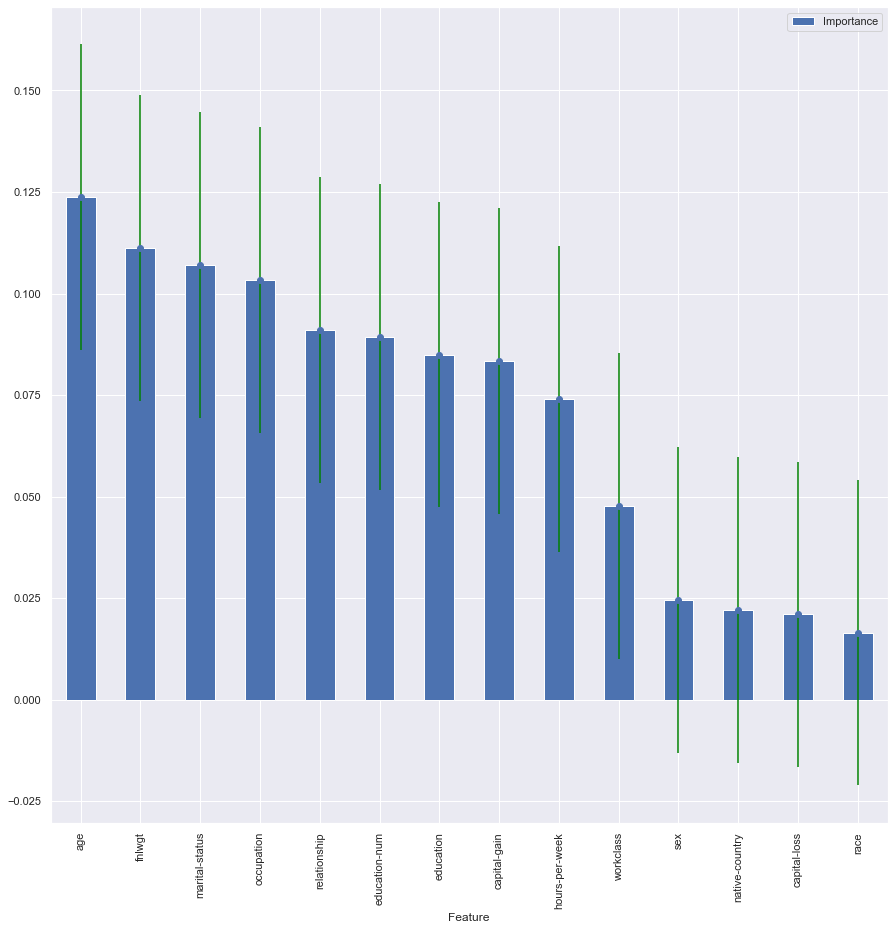

In [84]:
storedimportances2 = pd.DataFrame(featuredict.items(), columns=['Feature', 'Importance'])
storedimportances2['Standard_Deviation'] =  storedimportances2['Feature'].map(stddict)
storedimportances2=storedimportances2.sort_values(by=['Importance'], ascending=False)
si = pd.DataFrame(storedimportances2,columns=['Feature', 'Importance'])
si.plot(x ='Feature', y='Importance', kind = 'bar')
plt.errorbar(x=storedimportances2['Feature'],y=storedimportances2['Importance'],yerr = storedimportances2['Importance'].std(),
             fmt='o', ecolor = 'green')
plt.show()

In [46]:
storedimportances2.head()


,Feature,Importance,Standard_Deviation
0,age,0.123751,13.664354
2,fnlwgt,0.111284,105962.328993
5,marital-status,0.107035,0.440554
6,occupation,0.103336,0.289860
7,relationship,0.090954,0.413503


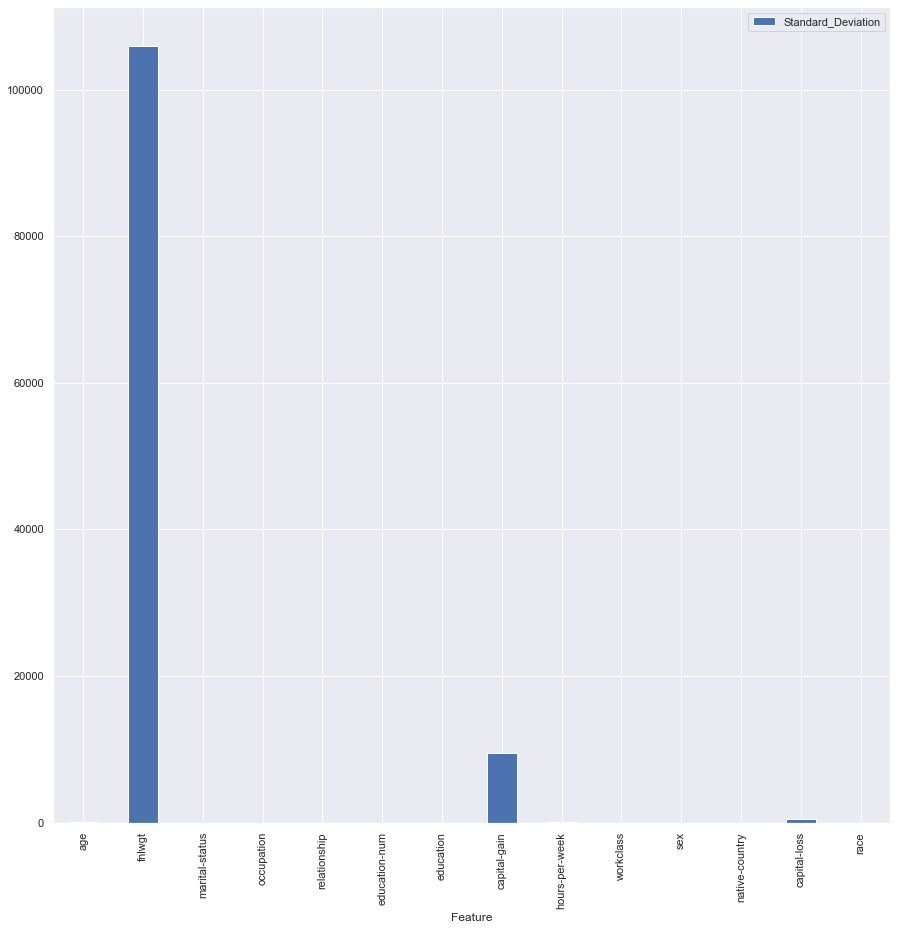

In [47]:
si2 = pd.DataFrame(storedimportances2,columns=['Feature', 'Standard_Deviation'])
si2.plot(x ='Feature', y='Standard_Deviation', kind = 'bar')
plt.show()

In [48]:
calledcol3=['age','fnlwgt','marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed','occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown','relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife','education-num']
calledcol4=['age','fnlwgt','marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed','occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown','relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife','education-num','education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college','capital-gain','hours-per-week','workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay','sex_Female', 'sex_Male']
X_train2_6=X_train2[calledcol3]
#y_train2_6=y_train2[calledcol3]
X_train21_6=preprocessing.scale(X_train2[calledcol3])
#y_train21_6=y_train21[calledcol3]
X_train2_11=X_train2[calledcol4]
#y_train2_11=y_train2[calledcol4]
X_train21_11=preprocessing.scale(X_train2[calledcol4])
#y_train21_11=y_train21[calledcol4]
X_val_6=X_val[calledcol3]
X_val_11=X_val[calledcol4]
X_val1_6=preprocessing.scale(X_val_6)
X_val1_11=preprocessing.scale(X_val_11)
sc2 = StandardScaler()
sc3 = StandardScaler()
sc4 = StandardScaler()
sc5 = StandardScaler()
sc2.fit(X_train2_6)
sc3.fit(X_train2_11)
sc4.fit(X_train21_6)
sc5.fit(X_train21_11)
sc2.transform(X_val_6)
sc3.transform(X_val_11)
sc4.transform(X_val1_6)
sc5.transform(X_val1_11)

array([[ 0.29821389,  0.21572171, -0.38791929, ..., -0.02336772,
        -0.69431307,  0.69431307],
       [-1.54086546, -0.39992592, -0.38791929, ..., -0.02336772,
         1.44027247, -1.44027247],
       [-1.09948642, -0.35171676, -0.38791929, ..., -0.02336772,
        -0.69431307,  0.69431307],
       ...,
       [ 0.0039612 , -1.50653938, -0.38791929, ..., -0.02336772,
         1.44027247, -1.44027247],
       [ 1.47522468, -1.32147352, -0.38791929, ..., -0.02336772,
        -0.69431307,  0.69431307],
       [ 0.07752437, -1.04145108, -0.38791929, ..., -0.02336772,
        -0.69431307,  0.69431307]])

In [49]:
gnbmodel3 = GaussianNB()
y_pred7 = gnbmodel3.fit(X_train2_6, y_train2).predict(X_val_6)
y_pred7

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
print("For GNB, specificity has worsened greatly, and all other metrics have slightly worsened except sensitivity which has improved.")
p1_metrics(y_val,y_pred7,include_cm=True)

For GNB, specificity has worsened greatly, and all other metrics have slightly worsened except sensitivity which has improved.


{'auc': 0.5538696425557501,
 'f1': 0.8488787780305492,
 'accuracy': 0.7462252137529561,
 'sensitivity': 0.9873991935483871,
 'specificity': 0.12034009156311315,
 'precision': 0.7444423332699981,
 'confusion_matrix': array([[ 184, 1345],
        [  50, 3918]], dtype=int64)}

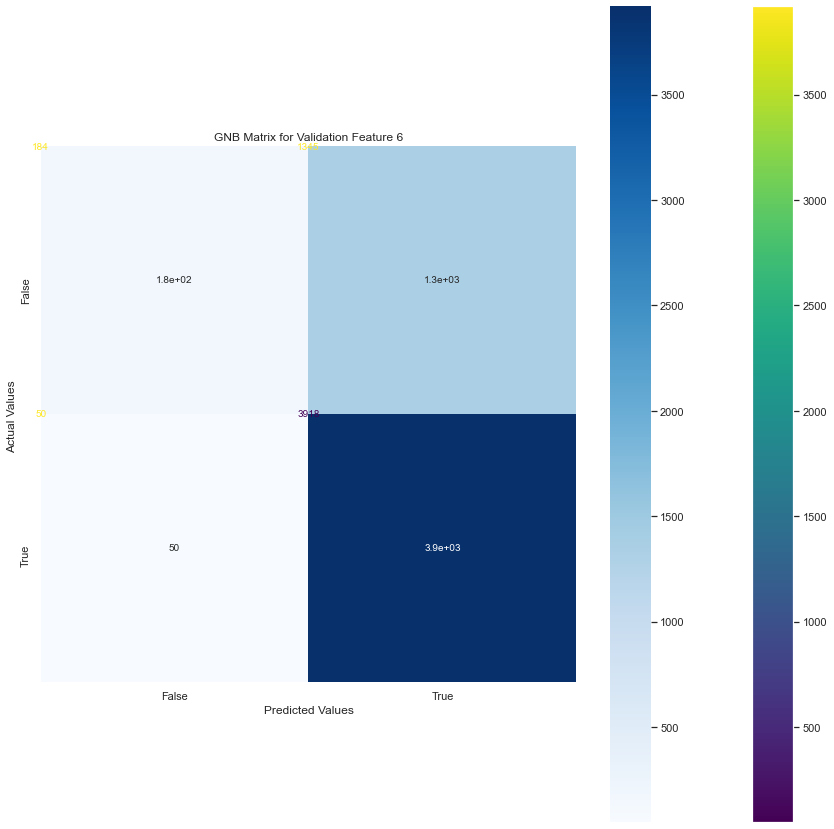

In [51]:
cf7=confusion_matrix(y_val, y_pred7)
plot_confusion_matrix(gnbmodel3, X_val_6, y_val)  
ax7 = sns.heatmap(cf7, annot=True, cmap='Blues')
ax7.set_title('GNB Matrix for Validation Feature 6');
ax7.set_xlabel('Predicted Values')
ax7.set_ylabel('Actual Values ');
ax7.xaxis.set_ticklabels(['False','True'])
ax7.yaxis.set_ticklabels(['False','True'])
plt.show()

In [52]:
#parameters2 = {'C': [5], 'gamma': ['auto'],'kernel': ['linear'],'random_state':[23784559]} 
#svmmodel5 = svm.SVC(C=5,gamma='auto',kernel='linear',random_state= 23784559) 
#svmgrid2 = GridSearchCV(svmmodel5,parameters2,scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
#svmgrid2.fit(X_train21_6, y_train21)
#y_pred8 = svmgrid2.predict(X_val1_6)
#svmmodel5 = svm.SVC(C=5,gamma='auto',kernel='linear',random_state= 23784559) 
#svmmodel5.fit(X_train21_6, y_train21)
#y_pred8 = svmmodel5.predict(X_val1_6)
#y_pred8
svmmodel5 = svm.SVC(C=5,gamma='scale',kernel='linear',random_state= 23784559) 
svmmodel5.fit(X_train21_6, y_train21)
y_pred8 = svmmodel5.predict(X_val1_6)
y_pred8

array([0, 1, 1, ..., 1, 1, 0])

In [53]:
print("All metrics have slightly decreased in quality compared to part 1.")
p1_metrics(y_val,y_pred8,include_cm=True)

All metrics have slightly decreased in quality compared to part 1.


{'auc': 0.7635061031087154,
 'f1': 0.8715377866900614,
 'accuracy': 0.813534655266509,
 'sensitivity': 0.8762600806451613,
 'specificity': 0.6507521255722695,
 'precision': 0.8668661181750187,
 'confusion_matrix': array([[ 995,  534],
        [ 491, 3477]], dtype=int64)}

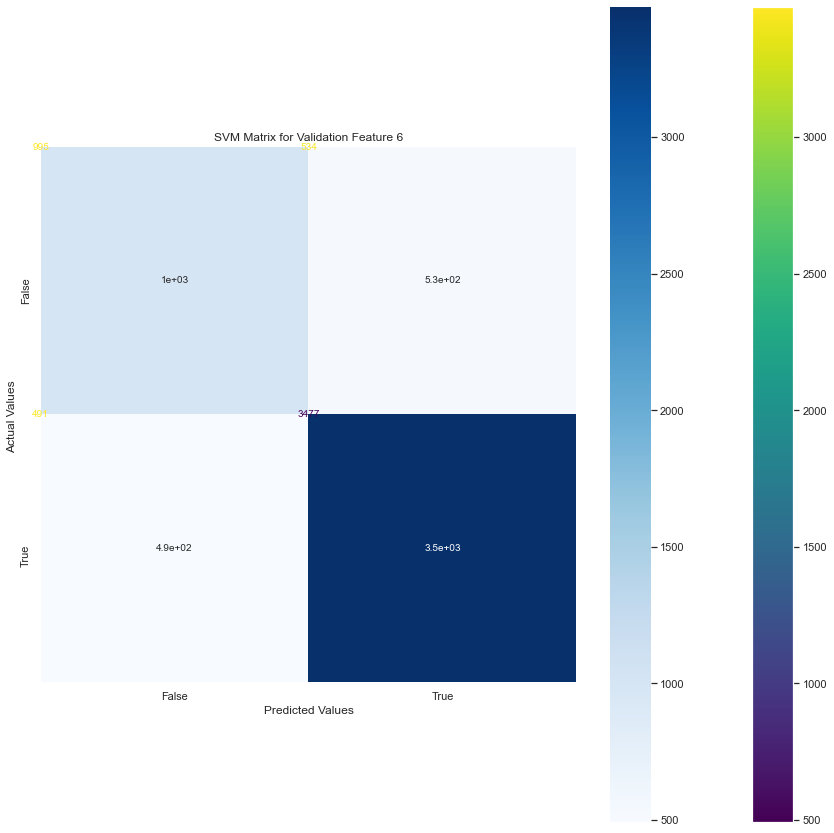

In [54]:
cf8=confusion_matrix(y_val, y_pred8)
plot_confusion_matrix(svmmodel5, X_val1_6, y_val)  
ax8 = sns.heatmap(cf8, annot=True, cmap='Blues')
ax8.set_title('SVM Matrix for Validation Feature 6');
ax8.set_xlabel('Predicted Values')
ax8.set_ylabel('Actual Values ');
ax8.xaxis.set_ticklabels(['False','True'])
ax8.yaxis.set_ticklabels(['False','True'])
plt.show()

In [55]:
rfcmodel5 = RandomForestClassifier(random_state=23784559, n_estimators= 40, max_depth=None, criterion='entropy')
rfcmodel5.fit(X_train2_6, y_train2)
y_pred9 = rfcmodel5.predict(X_val_6)
y_pred9

array([0, 1, 1, ..., 1, 1, 0])

In [56]:
print("All statistics outside of f1 have improved from slightly to significantly")
p1_metrics(y_val,y_pred9,include_cm=True)

All statistics outside of f1 have improved from slightly to significantly


{'auc': 0.9079411782157851,
 'f1': 0.9505273731793069,
 'accuracy': 0.928324540658541,
 'sensitivity': 0.9538810483870968,
 'specificity': 0.8620013080444735,
 'precision': 0.9471971971971972,
 'confusion_matrix': array([[1318,  211],
        [ 183, 3785]], dtype=int64)}

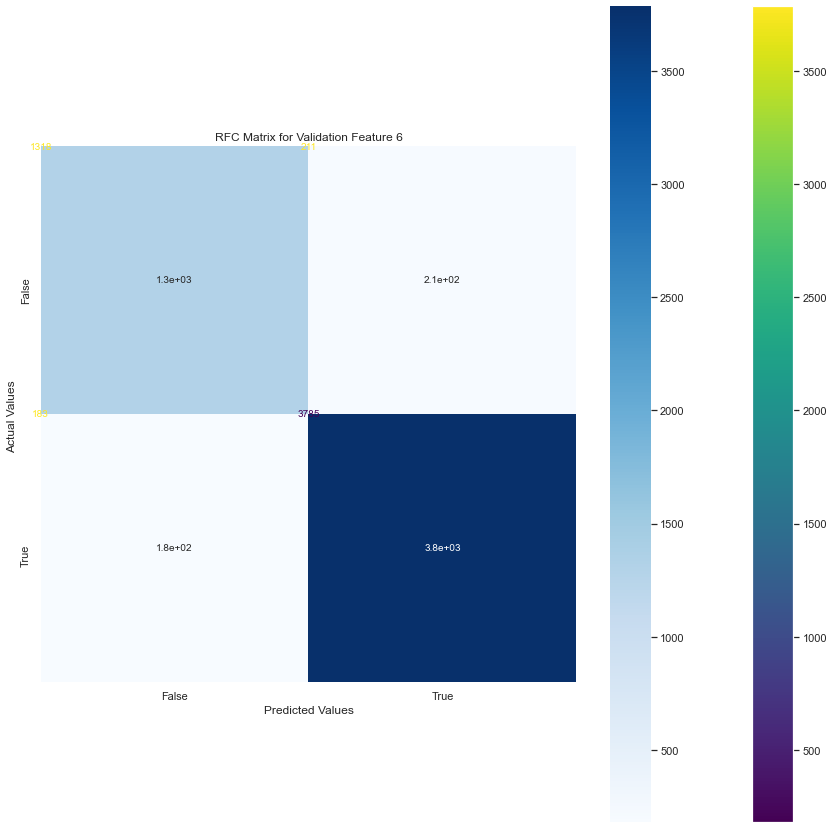

In [57]:
cf9=confusion_matrix(y_val, y_pred9)
plot_confusion_matrix(rfcmodel5, X_val_6, y_val)  
ax9 = sns.heatmap(cf9, annot=True, cmap='Blues')
ax9.set_title('RFC Matrix for Validation Feature 6');
ax9.set_xlabel('Predicted Values')
ax9.set_ylabel('Actual Values ');
ax9.xaxis.set_ticklabels(['False','True'])
ax9.yaxis.set_ticklabels(['False','True'])
plt.show()

In [58]:
gnbmodel4 = GaussianNB()
y_pred10 = gnbmodel4.fit(X_train2_11, y_train2).predict(X_val_11)
y_pred10

array([0, 1, 1, ..., 1, 1, 0])

In [59]:
print("All stats outside of specificity recieve small decreases compared to part 1")
p1_metrics(y_val,y_pred10,include_cm=True)

All stats outside of specificity recieve small decreases compared to part 1


{'auc': 0.5907826707841938,
 'f1': 0.8540121748754843,
 'accuracy': 0.7600509368746589,
 'sensitivity': 0.9722782258064516,
 'specificity': 0.2092871157619359,
 'precision': 0.7613972764949675,
 'confusion_matrix': array([[ 320, 1209],
        [ 110, 3858]], dtype=int64)}

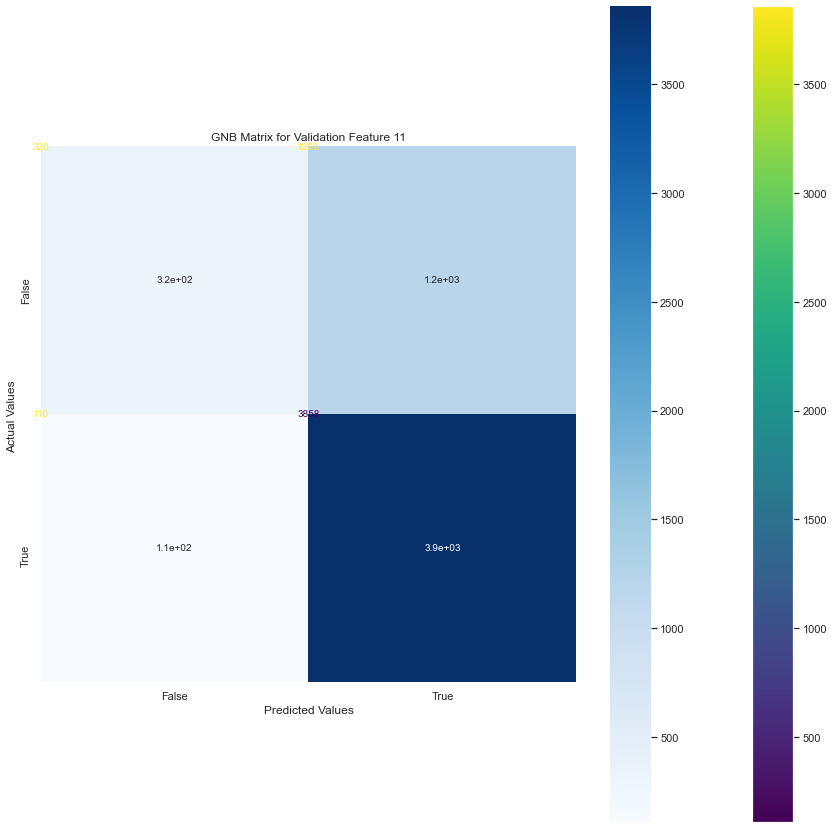

In [60]:
cf10=confusion_matrix(y_val, y_pred10)
plot_confusion_matrix(gnbmodel4, X_val_11, y_val)  
ax10 = sns.heatmap(cf10, annot=True, cmap='Blues')
ax10.set_title('GNB Matrix for Validation Feature 11');
ax10.set_xlabel('Predicted Values')
ax10.set_ylabel('Actual Values ');
ax10.xaxis.set_ticklabels(['False','True'])
ax10.yaxis.set_ticklabels(['False','True'])
plt.show()

In [61]:
svmmodel6 = svm.SVC(C=5,gamma='scale',kernel='linear',random_state= 23784559) 
svmmodel6.fit(X_train21_11, y_train21)
y_pred11 = svmmodel6.predict(X_val1_11)
y_pred11

array([0, 1, 1, ..., 1, 1, 0])

In [62]:
print("Outside miniscule differences in f1 and accuracy, there have been minor improvements in metrics compared to part 1.")
p1_metrics(y_val,y_pred11,include_cm=True)

Outside miniscule differences in f1 and accuracy, there have been minor improvements in metrics compared to part 1.


{'auc': 0.7934236646606467,
 'f1': 0.8955113144552986,
 'accuracy': 0.846279788975805,
 'sensitivity': 0.9125504032258065,
 'specificity': 0.6742969260954872,
 'precision': 0.8790968681718864,
 'confusion_matrix': array([[1031,  498],
        [ 347, 3621]], dtype=int64)}

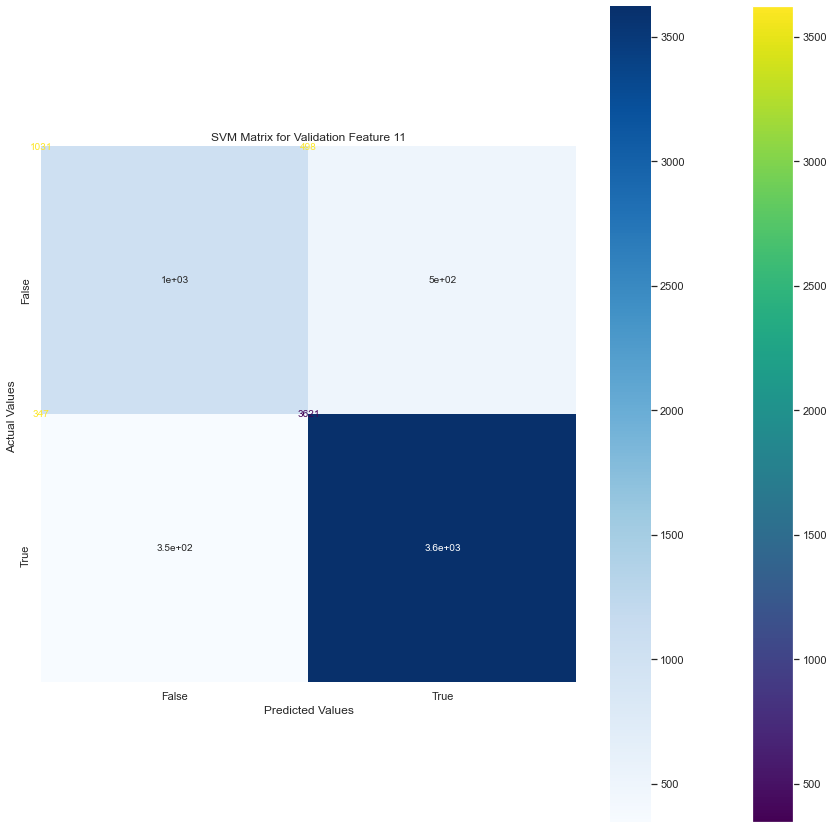

In [63]:
cf11=confusion_matrix(y_val, y_pred11)
plot_confusion_matrix(svmmodel6, X_val1_11, y_val)  
ax11 = sns.heatmap(cf11, annot=True, cmap='Blues')
ax11.set_title('SVM Matrix for Validation Feature 11');
ax11.set_xlabel('Predicted Values')
ax11.set_ylabel('Actual Values ');
ax11.xaxis.set_ticklabels(['False','True'])
ax11.yaxis.set_ticklabels(['False','True'])
plt.show()

In [64]:
rfcmodel6 = RandomForestClassifier(random_state=23784559, n_estimators= 40, max_depth=None, criterion='entropy')
rfcmodel6.fit(X_train2_11, y_train2)
y_pred12 = rfcmodel6.predict(X_val_11)
y_pred12

array([0, 1, 1, ..., 1, 1, 0])

In [65]:
print("Significant improvements for all metrics")
p1_metrics(y_val,y_pred12,include_cm=True)

Significant improvements for all metrics


{'auc': 0.926790962757653,
 'f1': 0.9606734514386228,
 'accuracy': 0.9430598508277243,
 'sensitivity': 0.9634576612903226,
 'specificity': 0.8901242642249837,
 'precision': 0.9579052868955149,
 'confusion_matrix': array([[1361,  168],
        [ 145, 3823]], dtype=int64)}

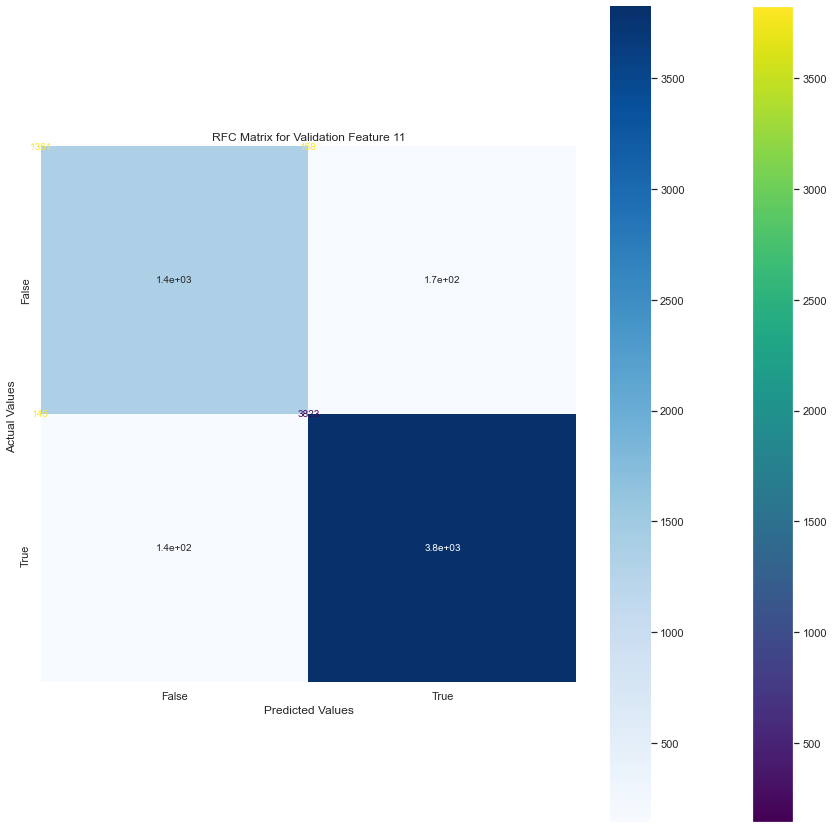

In [66]:
cf12=confusion_matrix(y_val, y_pred12)
plot_confusion_matrix(rfcmodel6, X_val_11, y_val)  
ax12 = sns.heatmap(cf12, annot=True, cmap='Blues')
ax12.set_title('RFC Matrix for Validation Feature 11');
ax12.set_xlabel('Predicted Values')
ax12.set_ylabel('Actual Values ');
ax12.xaxis.set_ticklabels(['False','True'])
ax12.yaxis.set_ticklabels(['False','True'])
plt.show()

In [67]:
print("The GNB with 6 and 11 features does worse in regards to specificity but has similar stats to part 1 validation. SVM has similar statistics for 6,11, and part 1 validation. RVM has similar stats for 6 and part 1 but has massive improvements for 11. Improvements are minimal and specificity for gnb has significantly worsened")

The GNB with 6 and 11 features does worse in regards to specificity but has similar stats to part 1 validation. SVM has similar statistics for 6,11, and part 1 validation. RVM has similar stats for 6 and part 1 but has massive improvements for 11. Improvements are minimal and specificity for gnb has significantly worsened


## Part 6: Final Models and Visualization

1. Using the full training set (**feature selection + training + validation**), train NB, SVM, and RF models, then apply them to the test set. Your final NB, SVM, and RF models should be named `gnb_final`, `svm_final`, and `rf_final`.
2. Create a bar chart of mean metrics from cross-validation, with standard deviation as an error bar for each model on the same plot. Use the NB model from Part 2, but the optimal models from Parts 3 and 4 for SVM and RF respectively.
3. Plot Receiver Operating Characteristic (ROC) curves for each final model in a single plot.
4. Which of the above metrics best illuminate the difference (if any) in model performance? Why?

In [68]:
sc6 = StandardScaler()
X_train01 = preprocessing.scale(X_train0)
sc6.fit(X_train01)
X_test11=X_test[calledcol4]
X_train0_11=X_train0[calledcol4]
sc8= StandardScaler()
X_test11_1=preprocessing.scale(X_test11)
X_train0_11_1=preprocessing.scale(X_train0_11)
sc8.fit(X_test11_1)
sc8.transform(X_train0_11_1)

array([[-0.13117086,  1.10805254,  2.5653527 , ..., -0.01907923,
        -0.68340025,  0.68340025],
       [ 1.19790133,  0.00580023, -0.38980995, ..., -0.01907923,
        -0.68340025,  0.68340025],
       [ 0.38569055, -0.01528917, -0.38980995, ..., -0.01907923,
        -0.68340025,  0.68340025],
       ...,
       [ 0.9763893 ,  0.36696931, -0.38980995, ..., -0.01907923,
        -0.68340025,  0.68340025],
       [-1.53408039, -0.6907694 , -0.38980995, ..., -0.01907923,
         1.46327134, -1.46327134],
       [ 1.41941337, -0.80994881,  2.5653527 , ..., -0.01907923,
        -0.68340025,  0.68340025]])

In [69]:
gnb_final = GaussianNB()
y_pred13 = gnb_final.fit(X_train0_11, y_train0).predict(X_test11)
p1_metrics(y_test,y_pred13,include_cm=True)

{'auc': 0.5933316827693391,
 'f1': 0.8571428571428571,
 'accuracy': 0.7645988721120611,
 'sensitivity': 0.9746422294752699,
 'specificity': 0.2120211360634082,
 'precision': 0.7649261083743842,
 'confusion_matrix': array([[ 321, 1193],
        [ 101, 3882]], dtype=int64)}

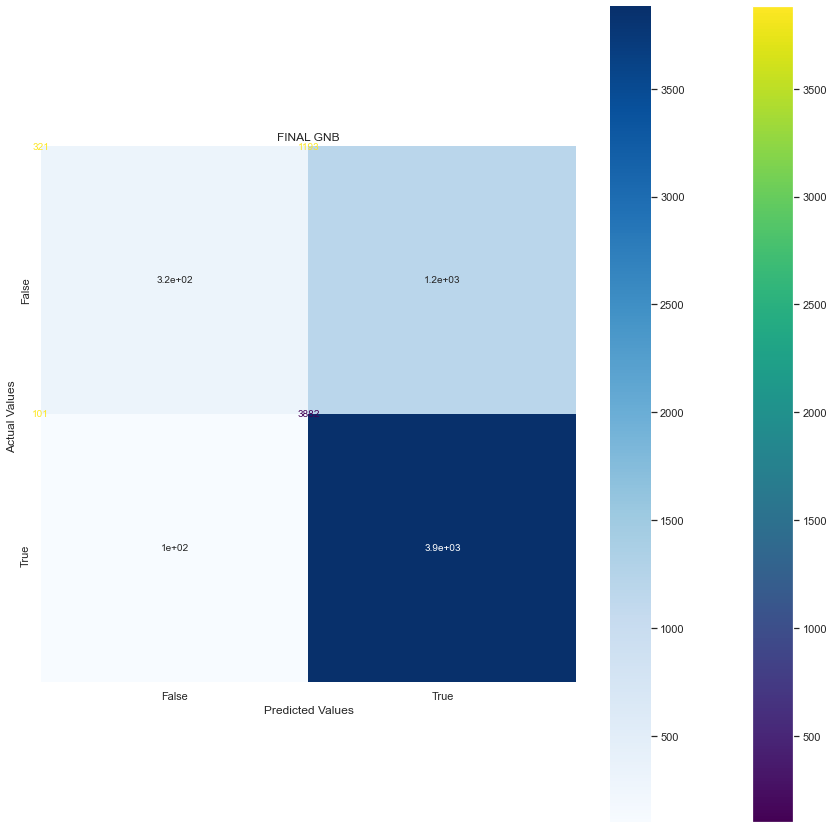

In [70]:
cf13=confusion_matrix(y_test, y_pred13)
plot_confusion_matrix(gnb_final, X_test11, y_test)  
ax13 = sns.heatmap(cf13, annot=True, cmap='Blues')
ax13.set_title('FINAL GNB');
ax13.set_xlabel('Predicted Values')
ax13.set_ylabel('Actual Values ');
ax13.xaxis.set_ticklabels(['False','True'])
ax13.yaxis.set_ticklabels(['False','True'])
plt.show()

In [71]:
svm_final = svm.SVC(C=5,gamma='scale',kernel='linear',random_state= 23784559) 
svm_final.fit(X_train0_11_1, y_train0)
y_pred14 = svm_final.predict(X_test11_1)
p1_metrics(y_test,y_pred14,include_cm=True)

{'auc': 0.7838248155718607,
 'f1': 0.8944982232569538,
 'accuracy': 0.8433691104238675,
 'sensitivity': 0.9163946773788602,
 'specificity': 0.6512549537648613,
 'precision': 0.8736237434179033,
 'confusion_matrix': array([[ 986,  528],
        [ 333, 3650]], dtype=int64)}

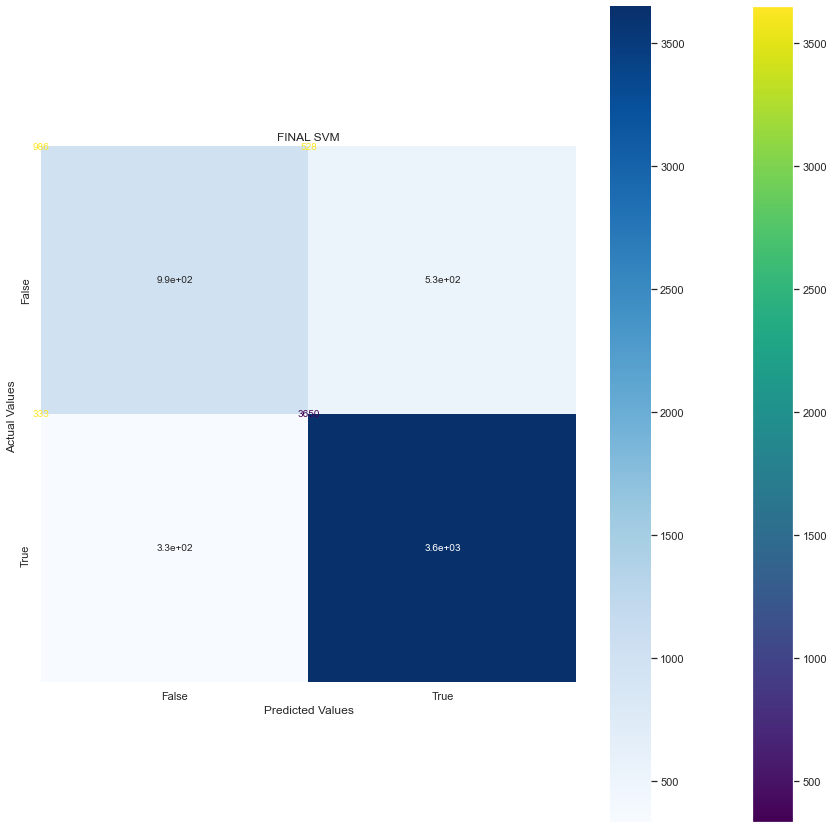

In [72]:
cf14=confusion_matrix(y_test, y_pred14)
plot_confusion_matrix(svm_final, X_test11_1, y_test)  
ax14 = sns.heatmap(cf14, annot=True, cmap='Blues')
ax14.set_title('FINAL SVM');
ax14.set_xlabel('Predicted Values')
ax14.set_ylabel('Actual Values ');
ax14.xaxis.set_ticklabels(['False','True'])
ax14.yaxis.set_ticklabels(['False','True'])
plt.show()

In [73]:
rf_final = RandomForestClassifier(random_state=23784559, n_estimators= 40, max_depth=None, criterion='entropy')
rf_final.fit(X_train0_11, y_train0)
y_pred15 = rf_final.predict(X_test11)
p1_metrics(y_test,y_pred15,include_cm=True)

{'auc': 0.7921197287945365,
 'f1': 0.8948148148148148,
 'accuracy': 0.8450063671093324,
 'sensitivity': 0.9098669344715039,
 'specificity': 0.6743725231175693,
 'precision': 0.8802526111246053,
 'confusion_matrix': array([[1021,  493],
        [ 359, 3624]], dtype=int64)}

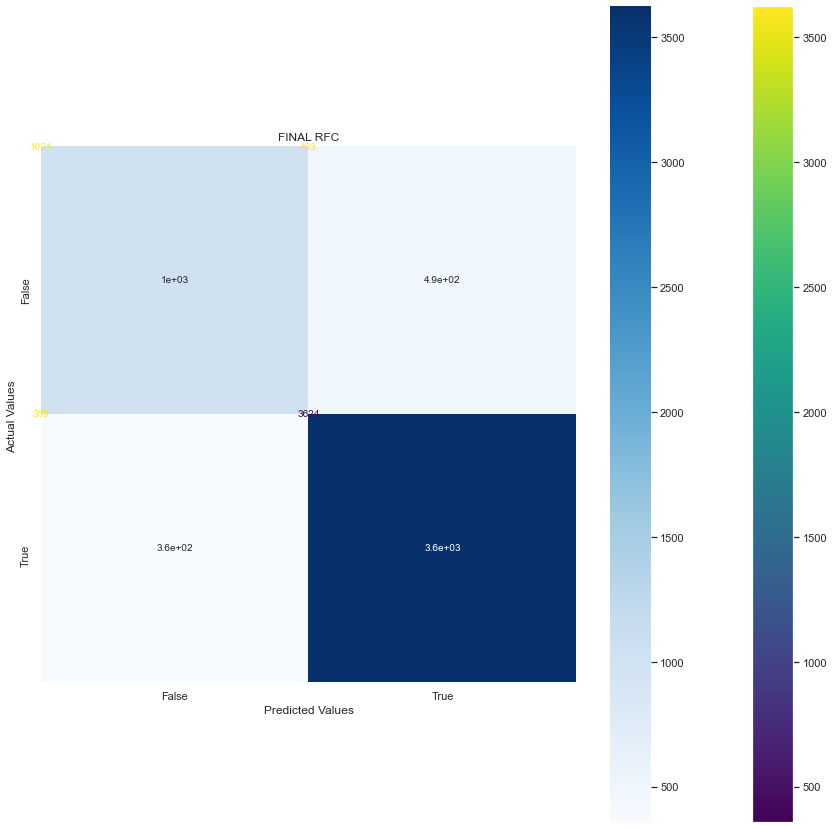

In [74]:
cf15=confusion_matrix(y_test, y_pred15)
plot_confusion_matrix(rf_final, X_test11, y_test)  
ax15 = sns.heatmap(cf15, annot=True, cmap='Blues')
ax15.set_title('FINAL RFC');
ax15.set_xlabel('Predicted Values')
ax15.set_ylabel('Actual Values ');
ax15.xaxis.set_ticklabels(['False','True'])
ax15.yaxis.set_ticklabels(['False','True'])
plt.show()

In [75]:
cv_resultsgnb = model_selection.cross_validate(gnb_final, X_train0_11, y_train0, cv=skf, scoring=metric_keys2)
print("GNB Final")
storedgnb=collate_cv_results(cv_resultsgnb,display=True)
cv_resultssvm = model_selection.cross_validate(svm_final, X_train0_11_1, y_train0, cv=skf, scoring=metric_keys2)
print("SVM Final")
storedsvm=collate_cv_results(cv_resultssvm,display=True)
cv_resultsrfc = model_selection.cross_validate(rf_final, X_train0_11, y_train0, cv=skf, scoring=metric_keys2)
print("RFC Final")
storedrfc=collate_cv_results(cv_resultsrfc,display=True)

GNB Final
fit_time 0.029003715515136717 (0.002269067350612742)
score_time 0.01959648132324219 (0.00048720113211278473)
test_roc_auc 0.8366079749260382 (0.009630951687788013)
test_f1 0.8565002187540267 (0.0024351644185825537)
test_accuracy 0.7638844666818285 (0.0037684448810021325)
test_precision 0.7653048493791516 (0.0021218250330429416)
SVM Final
fit_time 37.29123377799988 (1.4073198802368583)
score_time 1.6606133937835694 (0.037167817550248165)
test_roc_auc 0.90754446699007 (0.0031153029259078915)
test_f1 0.8957437673644364 (0.0032432444825661955)
test_accuracy 0.8457129861269047 (0.004992234295542904)
test_precision 0.8776883520981518 (0.004864585735425533)
RFC Final
fit_time 0.7767054557800293 (0.05620876823932214)
score_time 0.08080511093139649 (0.005111724421515819)
test_roc_auc 0.9063451942796876 (0.0026509093790764247)
test_f1 0.8981086992945195 (0.0007060903780568416)
test_accuracy 0.8503070275187629 (0.0012489906952691393)
test_precision 0.8861977979884033 (0.0034142987802026

In [76]:
def collate_cv_results2(cv_results,dict1,dict2,display=True):
    for k in cv_results:
        dict1[k]=np.mean(cv_results[k])
        dict2[k]=np.std(cv_results[k])

In [77]:
gnbdictmean={}
gnbdictstd={}
svmdictmean={}
svmdictstd={}
rfcdictmean={}
rfcdictstd={}
collate_cv_results2(cv_resultsgnb,gnbdictmean,gnbdictstd,display=True)
collate_cv_results2(cv_resultssvm,svmdictmean,svmdictstd,display=True)
collate_cv_results2(cv_resultsrfc,rfcdictmean,rfcdictstd,display=True)

In [78]:
storedcv = pd.DataFrame(gnbdictmean.items(), columns=['Metrics','gnb_mean'])
storedcv['gnb_std'] =  storedcv['Metrics'].map(gnbdictstd)
storedcv['svm_mean'] =  storedcv['Metrics'].map(svmdictmean)
storedcv['svm_std'] =  storedcv['Metrics'].map(svmdictstd)
storedcv['rfc_mean'] =  storedcv['Metrics'].map(rfcdictmean)
storedcv['rfc_std'] =  storedcv['Metrics'].map(rfcdictstd)
print(storedcv)

          Metrics  gnb_mean   gnb_std   svm_mean   svm_std  rfc_mean   rfc_std
0        fit_time  0.029004  0.002269  37.291234  1.407320  0.776705  0.056209
1      score_time  0.019596  0.000487   1.660613  0.037168  0.080805  0.005112
2    test_roc_auc  0.836608  0.009631   0.907544  0.003115  0.906345  0.002651
3         test_f1  0.856500  0.002435   0.895744  0.003243  0.898109  0.000706
4   test_accuracy  0.763884  0.003768   0.845713  0.004992  0.850307  0.001249
5  test_precision  0.765305  0.002122   0.877688  0.004865  0.886198  0.003414


In [93]:
storedcv2=storedcv.T

In [97]:
print(storedcv2)
print(storedrfc)

                  0           1             2         3              4  \
Metrics    fit_time  score_time  test_roc_auc   test_f1  test_accuracy   
gnb_mean   0.029004    0.019596      0.836608    0.8565       0.763884   
gnb_std    0.002269    0.000487      0.009631  0.002435       0.003768   
svm_mean  37.291234    1.660613      0.907544  0.895744       0.845713   
svm_std     1.40732    0.037168      0.003115  0.003243       0.004992   
rfc_mean   0.776705    0.080805      0.906345  0.898109       0.850307   
rfc_std    0.056209    0.005112      0.002651  0.000706       0.001249   

                       5  
Metrics   test_precision  
gnb_mean        0.765305  
gnb_std         0.002122  
svm_mean        0.877688  
svm_std         0.004865  
rfc_mean        0.886198  
rfc_std         0.003414  
{'fit_time_mean': 0.7767054557800293, 'fit_time_std': 0.05620876823932214, 'score_time_mean': 0.08080511093139649, 'score_time_std': 0.005111724421515819, 'test_roc_auc_mean': 0.9063451942796

In [105]:
#storedcv3 = pd.DataFrame(storedgnb.items(), columns=['Model','gnb'])
#storedcv3['svm'] =  storedcv3['Model'].map(storedsvm)
#storedcv3['rfc'] =  storedcv3['Model'].map(storedrfc)
storedcv3=pd.DataFrame({"rows":['fit_time_mean','fit_time_std','score_time_mean','score_time_std','test_roc_auc_mean','test_roc_auc_std','test_f1_mean','test_f1_std','test_accuracy_mean','test_accuracy_std','test_precision_mean','test_precision_std'],"gnb":[storedgnb['fit_time_mean'],storedgnb['fit_time_std'],storedgnb['score_time_mean'],storedgnb['score_time_std'],storedgnb['test_roc_auc_mean'],storedgnb['test_roc_auc_std'],storedgnb['test_f1_mean'],storedgnb['test_f1_std'],storedgnb['test_accuracy_mean'],storedgnb['test_accuracy_std'],storedgnb['test_precision_mean'],storedgnb['test_precision_std']],"svm":[storedsvm['fit_time_mean'],storedsvm['fit_time_std'],storedsvm['score_time_mean'],storedsvm['score_time_std'],storedsvm['test_roc_auc_mean'],storedsvm['test_roc_auc_std'],storedsvm['test_f1_mean'],storedsvm['test_f1_std'],storedsvm['test_accuracy_mean'],storedsvm['test_accuracy_std'],storedsvm['test_precision_mean'],storedsvm['test_precision_std']],"rfc":[storedrfc['fit_time_mean'],storedrfc['fit_time_std'],storedrfc['score_time_mean'],storedrfc['score_time_std'],storedrfc['test_roc_auc_mean'],storedrfc['test_roc_auc_std'],storedrfc['test_f1_mean'],storedrfc['test_f1_std'],storedrfc['test_accuracy_mean'],storedrfc['test_accuracy_std'],storedrfc['test_precision_mean'],storedrfc['test_precision_std']]})
print(storedcv3)

                   rows       gnb        svm       rfc
0         fit_time_mean  0.029004  37.291234  0.776705
1          fit_time_std  0.002269   1.407320  0.056209
2       score_time_mean  0.019596   1.660613  0.080805
3        score_time_std  0.000487   0.037168  0.005112
4     test_roc_auc_mean  0.836608   0.907544  0.906345
5      test_roc_auc_std  0.009631   0.003115  0.002651
6          test_f1_mean  0.856500   0.895744  0.898109
7           test_f1_std  0.002435   0.003243  0.000706
8    test_accuracy_mean  0.763884   0.845713  0.850307
9     test_accuracy_std  0.003768   0.004992  0.001249
10  test_precision_mean  0.765305   0.877688  0.886198
11   test_precision_std  0.002122   0.004865  0.003414


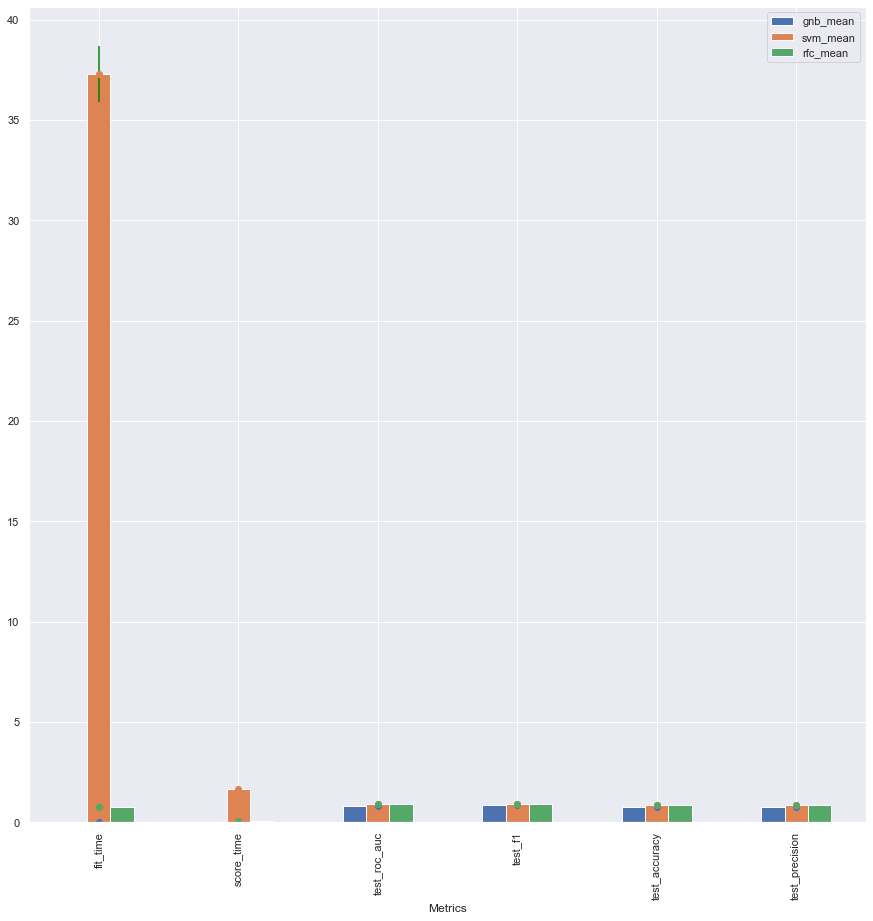

In [107]:
si3 = pd.DataFrame(storedcv,columns=['Metrics','gnb_mean','svm_mean','rfc_mean'])
si3.plot(x ='Metrics', y=['gnb_mean','svm_mean','rfc_mean'], kind = 'bar')
plt.errorbar(x=storedcv['Metrics'],y=storedcv['gnb_mean'],yerr = storedcv['gnb_std'],fmt='o', ecolor = 'green')
plt.errorbar(x=storedcv['Metrics'],y=storedcv['svm_mean'],yerr = storedcv['svm_std'],fmt='o', ecolor = 'green')
plt.errorbar(x=storedcv['Metrics'],y=storedcv['rfc_mean'],yerr = storedcv['rfc_std'],fmt='o', ecolor = 'green')
plt.show()

In [111]:
print("Error bars appear on same line marked by color dots,despite my best efforts, which is why you see different storedcvs.")

Error bars appear on same line marked by color dots,despite my best efforts, which is why you see different storedcvs.


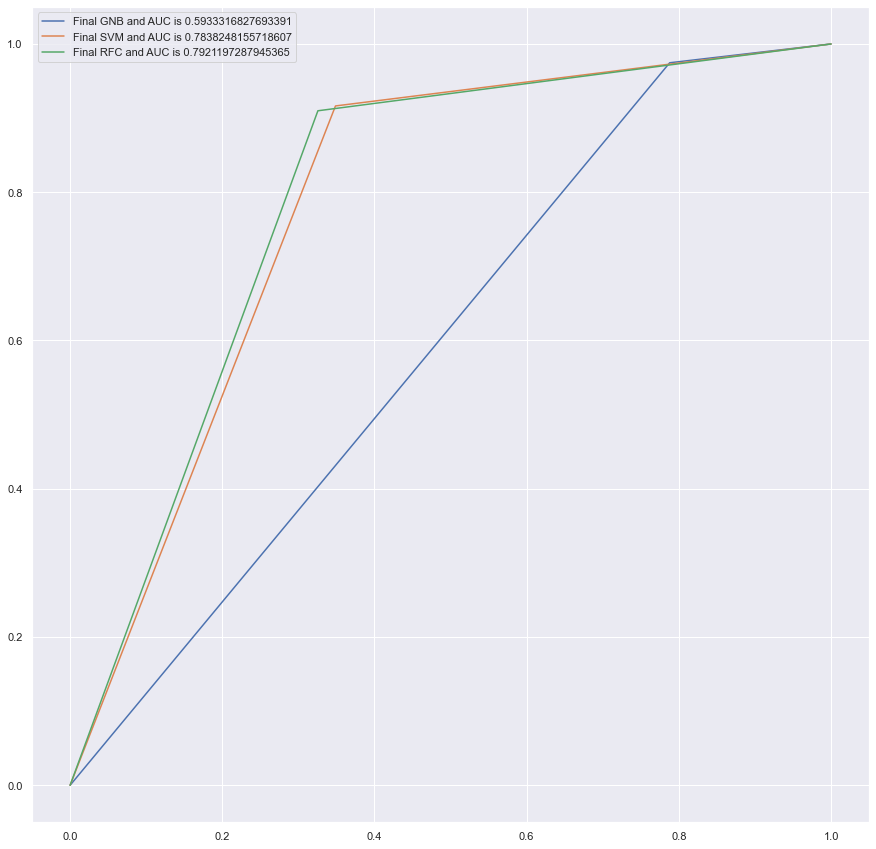

In [109]:
plt.figure(0).clf()
fp1, tp1,_= metrics.roc_curve(y_test, y_pred13)
auc1=metrics.roc_auc_score(y_test, y_pred13)
plt.plot(fp1,tp1,label="Final GNB and AUC is "+str(auc1))
fp2, tp2,_= metrics.roc_curve(y_test, y_pred14)
auc2=metrics.roc_auc_score(y_test, y_pred14)
plt.plot(fp2,tp2,label="Final SVM and AUC is "+str(auc2))
fp3, tp3,_= metrics.roc_curve(y_test, y_pred15)
auc3=metrics.roc_auc_score(y_test, y_pred15)
plt.plot(fp3,tp3,label="Final RFC and AUC is "+str(auc3))
plt.legend()

In [81]:
print("SVM is much slower, and outside time, SVM and RFC have very similar, close metrics. GNB is the most different and the fastest, but the metrics beyond that are the poorest. ROC_AUC,f1,accuracy, and precision matter the most, because all of these metrics play a role in why the curves differ. RFC has the best time and best metrics, so I would personally consider that to be the best model")

SVM is much slower, and outside time, SVM and RFC have very similar, close metrics. GNB is the most different and the fastest, but the metrics beyond that are the poorest. ROC_AUC,f1,accuracy, and precision matter the most, because all of these metrics play a role in why the curves differ. RFC has the best time and best metrics, so I would personally consider that to be the best model


## Part 7: Holdout Set Evaluation (Instructor)

Your final models `gnb_final`, `svm_final`, and `rf_final` will be evaluated on a holdout set by the instructor.